In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# -------------------------------
# Cancer Dataset Analysis
# -------------------------------
# Load the cancer dataset (adjust the file path if needed)
cancer_df = pd.read_csv("cancer.csv")

# Drop unnecessary columns (e.g., id and unnamed columns)
cancer_df = cancer_df.drop(columns=["id", "Unnamed: 32"], errors="ignore")

# Encode the target variable: malignant/benign (e.g., M and B)
cancer_df["diagnosis"] = LabelEncoder().fit_transform(cancer_df["diagnosis"])

# Split into features and target
X_cancer = cancer_df.drop(columns=["diagnosis"])
y_cancer = cancer_df["diagnosis"]

# Split into training and test sets
Xc_train, Xc_test, yc_train, yc_test = train_test_split(
    X_cancer, y_cancer, test_size=0.2, random_state=42, stratify=y_cancer
)

# Standardize features
scaler = StandardScaler()
Xc_train = scaler.fit_transform(Xc_train)
Xc_test = scaler.transform(Xc_test)

# Train Logistic Regression on cancer data
lr_cancer = LogisticRegression(max_iter=1000)
lr_cancer.fit(Xc_train, yc_train)
acc_lr_cancer = accuracy_score(yc_test, lr_cancer.predict(Xc_test))

# Train Linear SVM on cancer data
svc_cancer = SVC(kernel="linear")
svc_cancer.fit(Xc_train, yc_train)
acc_svc_cancer = accuracy_score(yc_test, svc_cancer.predict(Xc_test))


# -------------------------------
# Mushroom Dataset Analysis
# -------------------------------
# Load the mushroom dataset (adjust the file path if needed)
mushrooms_df = pd.read_csv("mushrooms.csv")

# Since the mushroom dataset contains categorical data, convert all columns to numeric
mushrooms_df = mushrooms_df.apply(LabelEncoder().fit_transform)

# Split into features and target (assuming "class" is the label)
X_mushrooms = mushrooms_df.drop(columns=["class"])
y_mushrooms = mushrooms_df["class"]

# Split into training and test sets
Xm_train, Xm_test, ym_train, ym_test = train_test_split(
    X_mushrooms, y_mushrooms, test_size=0.2, random_state=42, stratify=y_mushrooms
)

# Train Logistic Regression on mushroom data
lr_mush = LogisticRegression(max_iter=1000)
lr_mush.fit(Xm_train, ym_train)
acc_lr_mush = accuracy_score(ym_test, lr_mush.predict(Xm_test))

# Train Linear SVM on mushroom data
svc_mush = SVC(kernel="linear")
svc_mush.fit(Xm_train, ym_train)
acc_svc_mush = accuracy_score(ym_test, svc_mush.predict(Xm_test))


# -------------------------------
# Output the Results
# -------------------------------
print("Cancer Dataset Analysis:")
print("  Logistic Regression Accuracy: {result}".format(result=acc_lr_cancer))
print("  Linear SVM Accuracy: {result}".format(result=acc_svc_cancer))

print("\nMushroom Dataset Analysis:")
print("  Logistic Regression Accuracy: {result}".format(result=acc_lr_mush))
print("  Linear SVM Accuracy: {result}".format(result=acc_svc_mush))

# -------------------------------
# Interpretation of Results
# -------------------------------
# If the accuracy is very close to 1 (or {result} in the output), the data is likely linearly separable.
# Otherwise, if the accuracy is considerably lower, the data may be non-linearly separable.


Cancer Dataset Analysis:
  Logistic Regression Accuracy: 0.9649122807017544
  Linear SVM Accuracy: 0.9649122807017544

Mushroom Dataset Analysis:
  Logistic Regression Accuracy: 0.955076923076923
  Linear SVM Accuracy: 0.9790769230769231


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# -------------------------------
# Load and Preprocess Cancer Dataset
# -------------------------------
cancer_df = pd.read_csv("cancer.csv")
cancer_df = cancer_df.drop(columns=["id", "Unnamed: 32"], errors="ignore")
cancer_df["diagnosis"] = LabelEncoder().fit_transform(cancer_df["diagnosis"])

X_cancer = cancer_df.drop(columns=["diagnosis"])
y_cancer = cancer_df["diagnosis"]

Xc_train, Xc_test, yc_train, yc_test = train_test_split(
    X_cancer, y_cancer, test_size=0.2, random_state=42, stratify=y_cancer
)

scaler = StandardScaler()
Xc_train = scaler.fit_transform(Xc_train)
Xc_test = scaler.transform(Xc_test)

# -------------------------------
# SVM Parameter Tuning for Cancer Dataset (Assumed Linear)
# -------------------------------
# Define a parameter grid for a linear SVM
param_grid_linear = {'C': [0.01, 0.1, 1, 10, 100]}

svc_linear = SVC(kernel='linear')
grid_search_linear = GridSearchCV(svc_linear, param_grid_linear, cv=5)
grid_search_linear.fit(Xc_train, yc_train)

print("Cancer Dataset (Linear SVM):")
print("  Best Parameters:", grid_search_linear.best_params_)
print("  Best Cross-Validation Score: {:.3f}".format(grid_search_linear.best_score_))

# Evaluate on the test set using the best found parameters
best_linear_svc = grid_search_linear.best_estimator_
test_acc_cancer = accuracy_score(yc_test, best_linear_svc.predict(Xc_test))
print("  Test Accuracy: {:.3f}\n".format(test_acc_cancer))

# -------------------------------
# Load and Preprocess Mushroom Dataset
# -------------------------------
mushrooms_df = pd.read_csv("mushrooms.csv")
# Convert categorical features to numeric values using LabelEncoder
mushrooms_df = mushrooms_df.apply(LabelEncoder().fit_transform)

X_mushrooms = mushrooms_df.drop(columns=["class"])
y_mushrooms = mushrooms_df["class"]

Xm_train, Xm_test, ym_train, ym_test = train_test_split(
    X_mushrooms, y_mushrooms, test_size=0.2, random_state=42, stratify=y_mushrooms
)

# -------------------------------
# SVM Parameter Tuning for Mushroom Dataset (Using Linear SVM)
# -------------------------------
param_grid_linear_mush = {'C': [0.01, 0.1, 1, 10, 100]}

svc_linear_mush = SVC(kernel='linear')
grid_search_linear_mush = GridSearchCV(svc_linear_mush, param_grid_linear_mush, cv=5)
grid_search_linear_mush.fit(Xm_train, ym_train)

print("Mushroom Dataset (Linear SVM):")
print("  Best Parameters:", grid_search_linear_mush.best_params_)
print("  Best Cross-Validation Score: {:.3f}".format(grid_search_linear_mush.best_score_))

best_linear_svc_mush = grid_search_linear_mush.best_estimator_
test_acc_mush = accuracy_score(ym_test, best_linear_svc_mush.predict(Xm_test))
print("  Test Accuracy: {:.3f}\n".format(test_acc_mush))

# -------------------------------
# Optional: Tuning SVM with RBF Kernel (if exploring non-linear boundaries)
# -------------------------------
param_grid_rbf = {
    'C': [0.01, 0.1, 1, 10, 100],
    'gamma': [0.001, 0.01, 0.1, 1, 'scale', 'auto']
}

svc_rbf = SVC(kernel='rbf')
grid_search_rbf = GridSearchCV(svc_rbf, param_grid_rbf, cv=5)
grid_search_rbf.fit(Xm_train, ym_train)

print("Mushroom Dataset (RBF SVM):")
print("  Best Parameters:", grid_search_rbf.best_params_)
print("  Best Cross-Validation Score: {:.3f}".format(grid_search_rbf.best_score_))

best_rbf_svc = grid_search_rbf.best_estimator_
test_acc_mush_rbf = accuracy_score(ym_test, best_rbf_svc.predict(Xm_test))
print("  Test Accuracy: {:.3f}".format(test_acc_mush_rbf))


Cancer Dataset (Linear SVM):
  Best Parameters: {'C': 0.01}
  Best Cross-Validation Score: 0.969
  Test Accuracy: 0.956

Mushroom Dataset (Linear SVM):
  Best Parameters: {'C': 100}
  Best Cross-Validation Score: 0.989
  Test Accuracy: 0.990

Mushroom Dataset (RBF SVM):
  Best Parameters: {'C': 1, 'gamma': 0.1}
  Best Cross-Validation Score: 1.000
  Test Accuracy: 1.000


In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# -------------------------------
# Load and Preprocess Cancer Dataset
# -------------------------------
cancer_df = pd.read_csv("cancer.csv")
cancer_df = cancer_df.drop(columns=["id", "Unnamed: 32"], errors="ignore")
cancer_df["diagnosis"] = LabelEncoder().fit_transform(cancer_df["diagnosis"])

X_cancer = cancer_df.drop(columns=["diagnosis"])
y_cancer = cancer_df["diagnosis"]

Xc_train, Xc_test, yc_train, yc_test = train_test_split(
    X_cancer, y_cancer, test_size=0.2, random_state=42, stratify=y_cancer
)

scaler = StandardScaler()
Xc_train = scaler.fit_transform(Xc_train)
Xc_test = scaler.transform(Xc_test)

# -------------------------------
# SVM Parameter Tuning for Cancer Dataset (Assumed Linear)
# -------------------------------
# For a nearly linearly separable dataset, we only tune the regularization parameter C.
param_grid_linear = {'C': [0.01, 0.1, 1, 10, 100]}

svc_linear = SVC(kernel='linear')
grid_search_linear = GridSearchCV(svc_linear, param_grid_linear, cv=5)
grid_search_linear.fit(Xc_train, yc_train)

print("Cancer Dataset (Linear SVM):")
print("  Best Parameters:", grid_search_linear.best_params_)
print("  Best Cross-Validation Score: {:.3f}".format(grid_search_linear.best_score_))

# Evaluate on the test set using the best found parameters
best_linear_svc = grid_search_linear.best_estimator_
test_acc_cancer = accuracy_score(yc_test, best_linear_svc.predict(Xc_test))
print("  Test Accuracy: {:.3f}\n".format(test_acc_cancer))

# -------------------------------
# Load and Preprocess Mushroom Dataset
# -------------------------------
mushrooms_df = pd.read_csv("mushrooms.csv")
# Convert categorical features to numeric values using LabelEncoder
mushrooms_df = mushrooms_df.apply(LabelEncoder().fit_transform)

X_mushrooms = mushrooms_df.drop(columns=["class"])
y_mushrooms = mushrooms_df["class"]

Xm_train, Xm_test, ym_train, ym_test = train_test_split(
    X_mushrooms, y_mushrooms, test_size=0.2, random_state=42, stratify=y_mushrooms
)

# -------------------------------
# SVM Parameter Tuning for Mushroom Dataset (Using Linear SVM)
# -------------------------------
param_grid_linear_mush = {'C': [0.01, 0.1, 1, 10, 100]}

svc_linear_mush = SVC(kernel='linear')
grid_search_linear_mush = GridSearchCV(svc_linear_mush, param_grid_linear_mush, cv=5)
grid_search_linear_mush.fit(Xm_train, ym_train)

print("Mushroom Dataset (Linear SVM):")
print("  Best Parameters:", grid_search_linear_mush.best_params_)
print("  Best Cross-Validation Score: {:.3f}".format(grid_search_linear_mush.best_score_))

best_linear_svc_mush = grid_search_linear_mush.best_estimator_
test_acc_mush = accuracy_score(ym_test, best_linear_svc_mush.predict(Xm_test))
print("  Test Accuracy: {:.3f}\n".format(test_acc_mush))

# -------------------------------
# Optional: Tuning SVM with RBF Kernel (if exploring non-linear boundaries)
# -------------------------------
# Here, we include both C and gamma parameters for a non-linear decision boundary.
param_grid_rbf = {
    'C': [0.01, 0.1, 1, 10, 100],
    'gamma': [0.001, 0.01, 0.1, 1, 'scale', 'auto']
}

svc_rbf = SVC(kernel='rbf')
grid_search_rbf = GridSearchCV(svc_rbf, param_grid_rbf, cv=5)
grid_search_rbf.fit(Xm_train, ym_train)

print("Mushroom Dataset (RBF SVM):")
print("  Best Parameters:", grid_search_rbf.best_params_)
print("  Best Cross-Validation Score: {:.3f}".format(grid_search_rbf.best_score_))

best_rbf_svc = grid_search_rbf.best_estimator_
test_acc_mush_rbf = accuracy_score(ym_test, best_rbf_svc.predict(Xm_test))
print("  Test Accuracy: {:.3f}".format(test_acc_mush_rbf))


Cancer Dataset (Linear SVM):
  Best Parameters: {'C': 0.01}
  Best Cross-Validation Score: 0.969
  Test Accuracy: 0.956

Mushroom Dataset (Linear SVM):
  Best Parameters: {'C': 100}
  Best Cross-Validation Score: 0.989
  Test Accuracy: 0.990

Mushroom Dataset (RBF SVM):
  Best Parameters: {'C': 1, 'gamma': 0.1}
  Best Cross-Validation Score: 1.000
  Test Accuracy: 1.000


Cancer Dataset Accuracy: 0.956


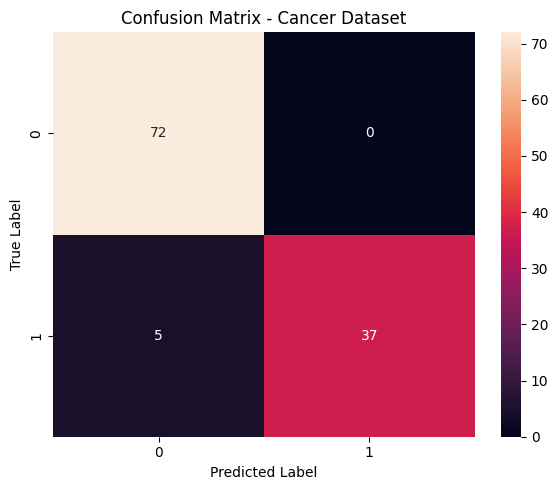

Mushroom Dataset Accuracy: 1.000


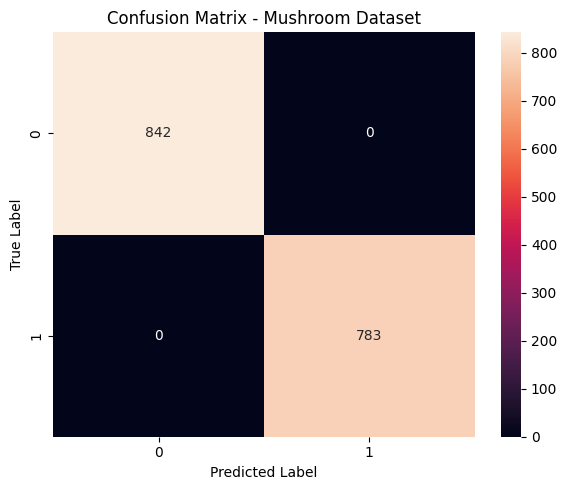

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score

# -------------------------------
# 1. Load and Preprocess Cancer Dataset
# -------------------------------
cancer_df = pd.read_csv("cancer.csv")
cancer_df = cancer_df.drop(columns=["id", "Unnamed: 32"], errors="ignore")

# Encode the diagnosis column (M=1, B=0, for instance)
cancer_df["diagnosis"] = LabelEncoder().fit_transform(cancer_df["diagnosis"])

X_cancer = cancer_df.drop(columns=["diagnosis"])
y_cancer = cancer_df["diagnosis"]

# Split into train/test sets
Xc_train, Xc_test, yc_train, yc_test = train_test_split(
    X_cancer, y_cancer, test_size=0.2, random_state=42, stratify=y_cancer
)

# Standardize the features
scaler = StandardScaler()
Xc_train = scaler.fit_transform(Xc_train)
Xc_test = scaler.transform(Xc_test)

# -------------------------------
# 2. Train SVM on Cancer Dataset
#    (Using best parameters found previously: C=0.01, kernel='linear')
# -------------------------------
svc_cancer = SVC(kernel='linear', C=0.01)
svc_cancer.fit(Xc_train, yc_train)

# Predict on the test set
y_pred_cancer = svc_cancer.predict(Xc_test)

# Calculate accuracy
acc_cancer = accuracy_score(yc_test, y_pred_cancer)
print("Cancer Dataset Accuracy: {:.3f}".format(acc_cancer))

# Create confusion matrix
cm_cancer = confusion_matrix(yc_test, y_pred_cancer)

# Plot confusion matrix for Cancer Dataset
plt.figure(figsize=(6, 5))
sns.heatmap(cm_cancer, annot=True, fmt='d', cmap='rocket')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Cancer Dataset")
plt.tight_layout()
plt.show()


# -------------------------------
# 3. Load and Preprocess Mushroom Dataset
# -------------------------------
mushrooms_df = pd.read_csv("mushrooms.csv")
# Convert all categorical features to numeric
mushrooms_df = mushrooms_df.apply(LabelEncoder().fit_transform)

X_mush = mushrooms_df.drop(columns=["class"])
y_mush = mushrooms_df["class"]

# Split into train/test sets
Xm_train, Xm_test, ym_train, ym_test = train_test_split(
    X_mush, y_mush, test_size=0.2, random_state=42, stratify=y_mush
)

# -------------------------------
# 4. Train SVM on Mushroom Dataset
#    (Using best parameters from the previous result: C=1, gamma=0.1, kernel='rbf')
# -------------------------------
svc_mush = SVC(kernel='rbf', C=1, gamma=0.1)
svc_mush.fit(Xm_train, ym_train)

# Predict on the test set
y_pred_mush = svc_mush.predict(Xm_test)

# Calculate accuracy
acc_mush = accuracy_score(ym_test, y_pred_mush)
print("Mushroom Dataset Accuracy: {:.3f}".format(acc_mush))

# Create confusion matrix
cm_mush = confusion_matrix(ym_test, y_pred_mush)

# Plot confusion matrix for Mushroom Dataset
plt.figure(figsize=(6, 5))
sns.heatmap(cm_mush, annot=True, fmt='d', cmap='rocket')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Mushroom Dataset")
plt.tight_layout()
plt.show()


In [5]:
cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [6]:
mushrooms_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   class                     8124 non-null   int64
 1   cap-shape                 8124 non-null   int64
 2   cap-surface               8124 non-null   int64
 3   cap-color                 8124 non-null   int64
 4   bruises                   8124 non-null   int64
 5   odor                      8124 non-null   int64
 6   gill-attachment           8124 non-null   int64
 7   gill-spacing              8124 non-null   int64
 8   gill-size                 8124 non-null   int64
 9   gill-color                8124 non-null   int64
 10  stalk-shape               8124 non-null   int64
 11  stalk-root                8124 non-null   int64
 12  stalk-surface-above-ring  8124 non-null   int64
 13  stalk-surface-below-ring  8124 non-null   int64
 14  stalk-color-above-ring    8124 non-null 

In [7]:
Xc_test.shape

(114, 30)

In [8]:
Xc_train.shape

(455, 30)

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# -------------------------------
# Load and Preprocess Cancer Dataset
# -------------------------------
cancer_df = pd.read_csv("cancer.csv")
cancer_df = cancer_df.drop(columns=["id", "Unnamed: 32"], errors="ignore")
cancer_df["diagnosis"] = LabelEncoder().fit_transform(cancer_df["diagnosis"])

X_cancer = cancer_df.drop(columns=["diagnosis"])
y_cancer = cancer_df["diagnosis"]

# Train/Test Split
Xc_train, Xc_test, yc_train, yc_test = train_test_split(
    X_cancer, y_cancer, test_size=0.2, random_state=42, stratify=y_cancer
)

# Standardize numeric features (often helps SVM)
scaler = StandardScaler()
Xc_train = scaler.fit_transform(Xc_train)
Xc_test = scaler.transform(Xc_test)

# -------------------------------
# Grid Search for Cancer Dataset
# -------------------------------
param_grid_cancer = {
    'kernel': ['linear'],           # focusing on linear kernel
    'C': [0.01, 0.1, 1, 10, 100]     # range of regularization strengths
}

svc_cancer = SVC()
grid_cancer = GridSearchCV(svc_cancer, param_grid_cancer, cv=5, scoring='accuracy', n_jobs=-1)
grid_cancer.fit(Xc_train, yc_train)

print("=== Cancer Dataset ===")
print("Best Parameters:", grid_cancer.best_params_)
print("Best CV Score: {:.3f}".format(grid_cancer.best_score_))

best_cancer_svc = grid_cancer.best_estimator_
test_acc_cancer = accuracy_score(yc_test, best_cancer_svc.predict(Xc_test))
print("Test Accuracy: {:.3f}\n".format(test_acc_cancer))


# -------------------------------
# Load and Preprocess Mushroom Dataset
# -------------------------------
mush_df = pd.read_csv("mushrooms.csv")
mush_df = mush_df.apply(LabelEncoder().fit_transform)

X_mush = mush_df.drop(columns=["class"])
y_mush = mush_df["class"]

Xm_train, Xm_test, ym_train, ym_test = train_test_split(
    X_mush, y_mush, test_size=0.2, random_state=42, stratify=y_mush
)

# -------------------------------
# Grid Search for Mushroom Dataset
# -------------------------------
param_grid_mush = {
    'kernel': ['linear'],           # focusing on linear kernel
    'C': [0.01, 0.1, 1, 10, 100]
}

svc_mush = SVC()
grid_mush = GridSearchCV(svc_mush, param_grid_mush, cv=5, scoring='accuracy', n_jobs=-1)
grid_mush.fit(Xm_train, ym_train)

print("=== Mushroom Dataset ===")
print("Best Parameters:", grid_mush.best_params_)
print("Best CV Score: {:.3f}".format(grid_mush.best_score_))

best_mush_svc = grid_mush.best_estimator_
test_acc_mush = accuracy_score(ym_test, best_mush_svc.predict(Xm_test))
print("Test Accuracy: {:.3f}\n".format(test_acc_mush))


=== Cancer Dataset ===
Best Parameters: {'C': 0.01, 'kernel': 'linear'}
Best CV Score: 0.969
Test Accuracy: 0.956

=== Mushroom Dataset ===
Best Parameters: {'C': 100, 'kernel': 'linear'}
Best CV Score: 0.989
Test Accuracy: 0.990



In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# -------------------------------
# Load and Preprocess Cancer Dataset
# -------------------------------
cancer_df = pd.read_csv("cancer.csv")
cancer_df = cancer_df.drop(columns=["id", "Unnamed: 32"], errors="ignore")
# Encode diagnosis (assumes B=0, M=1 in alphabetical order)
cancer_df["diagnosis"] = LabelEncoder().fit_transform(cancer_df["diagnosis"])

X_cancer = cancer_df.drop(columns=["diagnosis"])
y_cancer = cancer_df["diagnosis"]

# Train/Test Split
Xc_train, Xc_test, yc_train, yc_test = train_test_split(
    X_cancer, y_cancer, test_size=0.2, random_state=42, stratify=y_cancer
)

# Standardize numeric features
scaler = StandardScaler()
Xc_train = scaler.fit_transform(Xc_train)
Xc_test = scaler.transform(Xc_test)

# -------------------------------
# Grid Search for Cancer Dataset
# -------------------------------
param_grid_cancer = {
    'kernel': ['linear'],           
    'C': [0.01, 0.1, 1, 10, 100]     
}

svc_cancer = SVC()
grid_cancer = GridSearchCV(svc_cancer, param_grid_cancer, cv=5, scoring='accuracy', n_jobs=-1)
grid_cancer.fit(Xc_train, yc_train)

print("=== Cancer Dataset ===")
print("Best Parameters:", grid_cancer.best_params_)
print("Best CV Score: {:.3f}".format(grid_cancer.best_score_))

best_cancer_svc = grid_cancer.best_estimator_
y_pred_cancer = best_cancer_svc.predict(Xc_test)
test_acc_cancer = accuracy_score(yc_test, y_pred_cancer)
print("Test Accuracy: {:.3f}\n".format(test_acc_cancer))

# -------------------------------
# Produce Prediction Table for Cancer
# -------------------------------
# Map numeric labels back to B=0, M=1
cancer_label_map = {0: 'B', 1: 'M'}

# Create DataFrame
results_cancer = pd.DataFrame({
    'True Label': [cancer_label_map[val] for val in yc_test],
    'Predicted Label': [cancer_label_map[val] for val in y_pred_cancer]
})
results_cancer['Correct?'] = (results_cancer['True Label'] == results_cancer['Predicted Label'])

print("=== Cancer Dataset Prediction Table (first 10 rows) ===")
print(results_cancer.head(10))
print("=======================================================\n")


# -------------------------------
# Load and Preprocess Mushroom Dataset
# -------------------------------
mush_df = pd.read_csv("mushrooms.csv")
mush_df = mush_df.apply(LabelEncoder().fit_transform)

X_mush = mush_df.drop(columns=["class"])
y_mush = mush_df["class"]

Xm_train, Xm_test, ym_train, ym_test = train_test_split(
    X_mush, y_mush, test_size=0.2, random_state=42, stratify=y_mush
)

# -------------------------------
# Grid Search for Mushroom Dataset
# -------------------------------
param_grid_mush = {
    'kernel': ['linear'],           
    'C': [0.01, 0.1, 1, 10, 100]
}

svc_mush = SVC()
grid_mush = GridSearchCV(svc_mush, param_grid_mush, cv=5, scoring='accuracy', n_jobs=-1)
grid_mush.fit(Xm_train, ym_train)

print("=== Mushroom Dataset ===")
print("Best Parameters:", grid_mush.best_params_)
print("Best CV Score: {:.3f}".format(grid_mush.best_score_))

best_mush_svc = grid_mush.best_estimator_
y_pred_mush = best_mush_svc.predict(Xm_test)
test_acc_mush = accuracy_score(ym_test, y_pred_mush)
print("Test Accuracy: {:.3f}\n".format(test_acc_mush))

# -------------------------------
# Produce Prediction Table for Mushrooms
# -------------------------------
# Map numeric labels back to e=0, p=1 (check if your encoder used the opposite)
mush_label_map = {0: 'e', 1: 'p'}

results_mush = pd.DataFrame({
    'True Label': [mush_label_map[val] for val in ym_test],
    'Predicted Label': [mush_label_map[val] for val in y_pred_mush]
})
results_mush['Correct?'] = (results_mush['True Label'] == results_mush['Predicted Label'])

print("=== Mushroom Dataset Prediction Table (first 10 rows) ===")
print(results_mush.head(10))
print("=========================================================")


=== Cancer Dataset ===
Best Parameters: {'C': 0.01, 'kernel': 'linear'}
Best CV Score: 0.969
Test Accuracy: 0.956

=== Cancer Dataset Prediction Table (first 10 rows) ===
  True Label Predicted Label  Correct?
0          B               B      True
1          M               M      True
2          B               B      True
3          M               B     False
4          B               B      True
5          B               B      True
6          M               M      True
7          B               B      True
8          B               B      True
9          B               B      True



KeyboardInterrupt: 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix

# -------------------------------
# 1. Load and Preprocess Cancer Dataset
# -------------------------------
cancer_df = pd.read_csv("cancer.csv")
cancer_df = cancer_df.drop(columns=["id", "Unnamed: 32"], errors="ignore")
# Encode diagnosis (B -> 0, M -> 1) by alphabetical order
cancer_df["diagnosis"] = LabelEncoder().fit_transform(cancer_df["diagnosis"])

X_cancer = cancer_df.drop(columns=["diagnosis"])
y_cancer = cancer_df["diagnosis"]

Xc_train, Xc_test, yc_train, yc_test = train_test_split(
    X_cancer, y_cancer, test_size=0.2, random_state=42, stratify=y_cancer
)

# Standardize numeric features (helps SVM)
scaler = StandardScaler()
Xc_train = scaler.fit_transform(Xc_train)
Xc_test = scaler.transform(Xc_test)

# -------------------------------
# 2. Grid Search for Cancer Dataset
# -------------------------------
param_grid_cancer = {
    'kernel': ['linear'],
    'C': [0.01, 0.1, 1, 10, 100]
}

svc_cancer = SVC()
grid_cancer = GridSearchCV(svc_cancer, param_grid_cancer, cv=5, scoring='accuracy', n_jobs=-1)
grid_cancer.fit(Xc_train, yc_train)

print("=== Cancer Dataset ===")
print("Best Parameters:", grid_cancer.best_params_)
print("Best CV Score: {:.3f}".format(grid_cancer.best_score_))

# Retrieve the best model and predict
best_cancer_svc = grid_cancer.best_estimator_
y_pred_cancer = best_cancer_svc.predict(Xc_test)
acc_cancer = accuracy_score(yc_test, y_pred_cancer)
print("Test Accuracy: {:.3f}".format(acc_cancer))

# -------------------------------
# 3. Confusion Matrix + Heatmap (Cancer)
# -------------------------------
cm_cancer = confusion_matrix(yc_test, y_pred_cancer)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_cancer, annot=True, fmt='d', cmap='rocket')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Cancer Dataset")
plt.tight_layout()
plt.show()

# -------------------------------
# 4. Prediction Table (Cancer)
# -------------------------------
# Map numeric labels back to B (0) or M (1)
cancer_label_map = {0: 'B', 1: 'M'}

results_cancer = pd.DataFrame({
    'True Label': [cancer_label_map[val] for val in yc_test],
    'Predicted Label': [cancer_label_map[val] for val in y_pred_cancer]
})
results_cancer['Correct?'] = results_cancer['True Label'] == results_cancer['Predicted Label']

print("\n=== Cancer Dataset Prediction Table (first 10 rows) ===")
print(results_cancer.head(10))
print("=======================================================\n")


# -------------------------------
# 5. Load and Preprocess Mushroom Dataset
# -------------------------------
mush_df = pd.read_csv("mushrooms.csv")
mush_df = mush_df.apply(LabelEncoder().fit_transform)

X_mush = mush_df.drop(columns=["class"])
y_mush = mush_df["class"]

Xm_train, Xm_test, ym_train, ym_test = train_test_split(
    X_mush, y_mush, test_size=0.2, random_state=42, stratify=y_mush
)

# -------------------------------
# 6. Grid Search for Mushroom Dataset
# -------------------------------
param_grid_mush = {
    'kernel': ['linear'],
    'C': [0.01, 0.1, 1, 10, 100]
}

svc_mush = SVC()
grid_mush = GridSearchCV(svc_mush, param_grid_mush, cv=5, scoring='accuracy', n_jobs=-1)
grid_mush.fit(Xm_train, ym_train)

print("=== Mushroom Dataset ===")
print("Best Parameters:", grid_mush.best_params_)
print("Best CV Score: {:.3f}".format(grid_mush.best_score_))

# Retrieve the best model and predict
best_mush_svc = grid_mush.best_estimator_
y_pred_mush = best_mush_svc.predict(Xm_test)
acc_mush = accuracy_score(ym_test, y_pred_mush)
print("Test Accuracy: {:.3f}".format(acc_mush))

# -------------------------------
# 7. Confusion Matrix + Heatmap (Mushroom)
# -------------------------------
cm_mush = confusion_matrix(ym_test, y_pred_mush)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_mush, annot=True, fmt='d', cmap='rocket')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Mushroom Dataset")
plt.tight_layout()
plt.show()

# -------------------------------
# 8. Prediction Table (Mushroom)
# -------------------------------
# Map numeric labels back to e (0) or p (1) - adjust if your encoder is reversed
mush_label_map = {0: 'e', 1: 'p'}

results_mush = pd.DataFrame({
    'True Label': [mush_label_map[val] for val in ym_test],
    'Predicted Label': [mush_label_map[val] for val in y_pred_mush]
})
results_mush['Correct?'] = results_mush['True Label'] == results_mush['Predicted Label']

print("\n=== Mushroom Dataset Prediction Table (first 10 rows) ===")
print(results_mush.head(10))
print("=========================================================")
